In [ ]:
from google.colab import files
upload=files.upload()

Saving petrol_consumption.csv to petrol_consumption (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('petrol_consumption.csv')

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


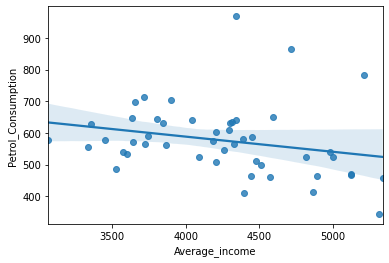

In [ ]:
sns.regplot(x='Average_income',y='Petrol_Consumption',data=df)

In this plot we can see the different levels of petrol consumption according to the average income of the drivers.

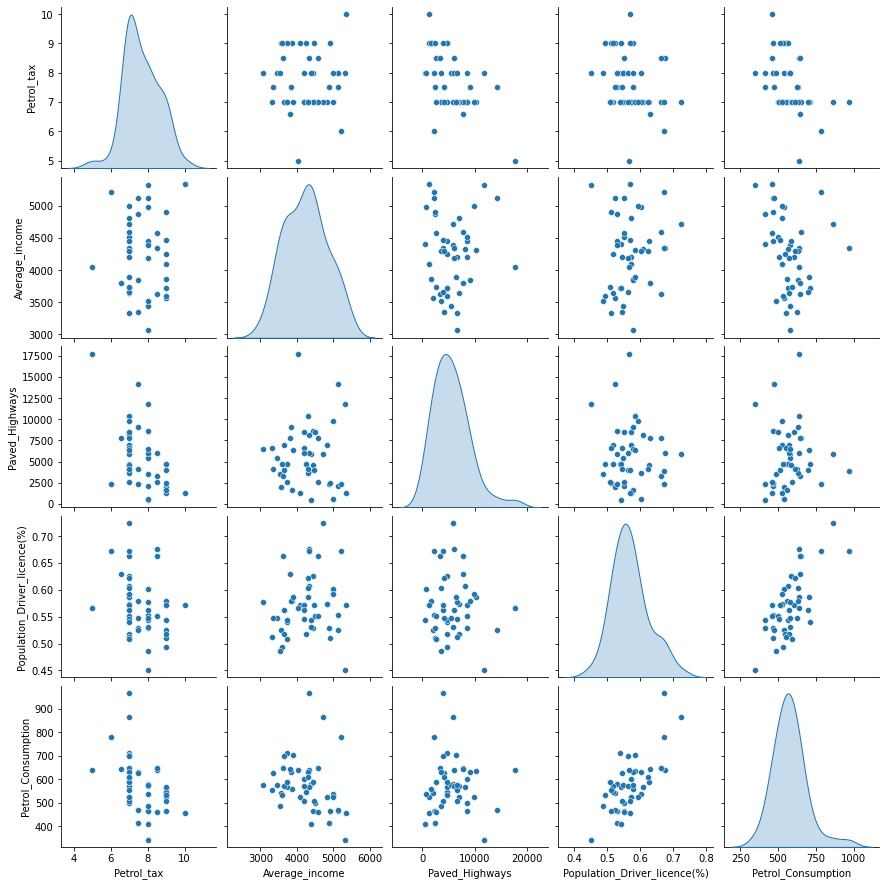

In [ ]:
sns.pairplot(df,diag_kind='kde')

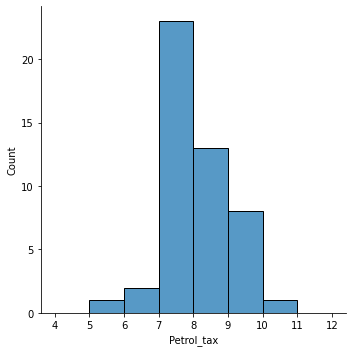

In [ ]:
sns.displot(df, x='Petrol_tax', bins=[4,5, 6, 7,8,9,10,11,12])

In the above plot we can see the highest number of petrol tax comes between 7 to 8%.

In the upcoming operations we are going to apply Regression to find out the prediction of petrol consumption and choose the best regression type according to accuracy.

In [ ]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]

In [ ]:
x.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [ ]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


In [ ]:
df.describe()

,Actual,Predicted
count,10.000000,10.000000
mean,549.400000,565.827107
std,80.687601,71.811927
min,410.000000,469.391989
25%,498.750000,504.458123
50%,574.000000,557.687939
75%,579.250000,632.390471
max,704.000000,672.475177


We can see the mean value of actual and predicted values. We can see the closer prediction here. Also the RSME value is 68.31 which is 14% higher than the petrol consumption of all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

Using KNeighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5)
model.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
29,534,597.8
4,410,498.4
26,577,593.0
30,571,582.8
32,577,582.8
37,704,599.4
34,487,618.8
40,587,564.0
7,467,517.4
10,580,672.6


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 58.81999999999998
Mean Squared Error: 5227.019999999999
Root Mean Squared Error: 72.29813275597094


Conclusion:
          Considering both Linear Regression and KNeighbors Regressor. The value predicted by Linear Regressor algorithm gives more accuracy.